# Segunda Lei de Newton

$$\frac{d²r}{dt²}m=F_r(t,r,v)$$

## Lançamento oblíquo com resistência do ar

$$\frac{dx}{dt} = v_x$$
$$\frac{dv_x}{dt} = -\frac{A}{m}vv_x$$
$$\frac{dy}{dt} = v_y$$
$$\frac{dv_x}{dt} = -g-\frac{A}{m}vv_y$$

https://scipython.com/book2/chapter-8-scipy/examples/a-projectile-with-air-resistance/

In [64]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [146]:
# edo (modelo)
def dfdt(t, f, A = 0.05, m = 1, g = 10):
    x, vx, y, vy = f
    v = np.hypot(vx, vy)
    ax = -A/m*v*vx
    ay = -g-A/m*v*vx
    return vx, ax, vy, ay

In [147]:
# condição de parada
def solo(t, f):
    x, vx, y, vy = f
    return y
solo.terminal = True
solo.direction = -1

In [148]:
# condições iniciais e parametros
f0 = 0, 10, 0, 30 # x0, vx0, y0 e vy0
t0, tf = 0, 100
tpoints = np.linspace(t0,tf,100*tf)

In [149]:
# resolvendo a edo
sol1 = solve_ivp(dfdt, (t0, tf), y0=f0, t_eval=tpoints, events=solo)
sol1


  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  1.000e-02 ...  4.520e+00  4.530e+00]
        y: [[ 0.000e+00  9.923e-02 ...  1.223e+01  1.224e+01]
            [ 1.000e+01  9.844e+00 ...  5.191e-01  5.127e-01]
            [ 0.000e+00  2.987e-01 ...  4.713e-01  2.239e-01]
            [ 3.000e+01  2.974e+01 ... -2.469e+01 -2.479e+01]]
      sol: None
 t_events: [array([ 4.539e+00])]
 y_events: [array([[ 1.224e+01,  5.070e-01,  0.000e+00, -2.489e+01]])]
     nfev: 74
     njev: 0
      nlu: 0

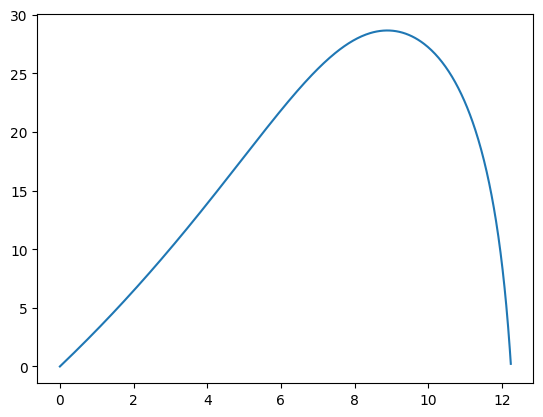

In [150]:
x, y = sol1.y[0], sol1.y[2]
plt.plot(x,y)